In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import csv
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Prices

In [2]:
#Loading data

file_path = "C:\\Users\\withl\\Desktop\\Final Project\\NATIONAL WHOLESALE PRICE OF SOME SELECTED COMMODITIES, 1970-2017.csv"
# Read the CSV file with a specified encoding
Prices= pd.read_csv(file_path, encoding='ISO-8859-1')

Prices.head()

,YEAR,MONTH,COMMODITY,WEIGHT,PRICE
0,1970,JANUARY,MAIZE,100,0.0011
1,1970,FEBRUARY,MAIZE,100,0.0012
2,1970,MARCH,MAIZE,100,0.0012
3,1970,APRIL,MAIZE,100,0.0013
4,1970,MAY,MAIZE,100,0.0014


In [3]:
#rows vs colunms
Prices.shape

(3216, 5)

In [4]:
#Renaming columns
Prices.rename(columns={'YEAR': 'Year', 'MONTH': 'Month','WEIGHT':'Weight', 'PRICE':'Price', 'COMMODITY': 'Commodity'}, inplace=True)
Prices.head()

,Year,Month,Commodity,Weight,PRICE
0,1970,JANUARY,MAIZE,100,0.0011
1,1970,FEBRUARY,MAIZE,100,0.0012
2,1970,MARCH,MAIZE,100,0.0012
3,1970,APRIL,MAIZE,100,0.0013
4,1970,MAY,MAIZE,100,0.0014


In [5]:
#Remove trailing spaces at the end of columns
Prices.columns = Prices.columns.str.strip()

In [6]:
#finding null values
Prices.isna().sum()

Year         0
Month        0
Commodity    0
Weight       0
PRICE        0
dtype: int64

In [7]:
#finding data types
Prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       3216 non-null   int64  
 1   Month      3216 non-null   object 
 2   Commodity  3216 non-null   object 
 3   Weight     3216 non-null   int64  
 4   PRICE      3216 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 125.8+ KB


In [8]:
#finding duplicate values
Prices.duplicated().sum()

0

In [9]:
#nbr of items in this two columns
Prices[['Commodity','Weight']].value_counts()

Commodity   Weight
COCOYAM     91        576
LOCAL RICE  100       576
MAIZE       100       576
SORGHUM     109       576
YAM         250       576
MILLET      93        336
Name: count, dtype: int64

In [10]:
#statistiscal overview
Prices.describe()

,Year,Weight,PRICE
count,3216.000000,3216.000000,3216.000000
mean,1994.541045,126.134328,17504.262189
std,13.711747,58.155254,85222.159690
min,1970.000000,91.000000,0.000900
25%,1983.000000,93.000000,0.827500
50%,1995.000000,100.000000,19.200500
75%,2006.000000,109.000000,195.812500
max,2017.000000,250.000000,920550.000000


In [11]:
#find year range
Prices['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017], dtype=int64)

In [12]:
# Convert 'COMMODITY' column values to lowercase
Prices['Commodity'] = Prices['Commodity'].str.lower()

#find unique items
Prices['Commodity'].unique()

array(['maize', 'millet', 'local rice', 'sorghum', 'yam', 'cocoyam'],
      dtype=object)

In [13]:
#replacing words
Prices['Commodity'] = Prices['Commodity'].str.replace('local rice', 'rice')
Prices['Commodity'].unique()

array(['maize', 'millet', 'rice', 'sorghum', 'yam', 'cocoyam'],
      dtype=object)

In [14]:
# find unique items
Prices['Month'].unique()

array(['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY',
       'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER'],
      dtype=object)

In [15]:
# Map month names to numerical values
month_mapping = {
    'JANUARY': 1, 'FEBRUARY': 2, 'MARCH': 3, 'APRIL': 4, 'MAY': 5, 'JUNE': 6,
    'JULY': 7, 'AUGUST': 8, 'SEPTEMBER': 9, 'OCTOBER': 10, 'NOVEMBER': 11, 'DECEMBER': 12
}

Prices['Month'] = Prices['Month'].map(month_mapping)


In [16]:
Prices.head()

,Year,Month,Commodity,Weight,PRICE
0,1970,1,maize,100,0.0011
1,1970,2,maize,100,0.0012
2,1970,3,maize,100,0.0012
3,1970,4,maize,100,0.0013
4,1970,5,maize,100,0.0014


In [105]:
#Checking data types
Prices.dtypes

Year           int64
Month          int64
Commodity     object
Weight         int64
PRICE        float64
day            int64
dtype: object

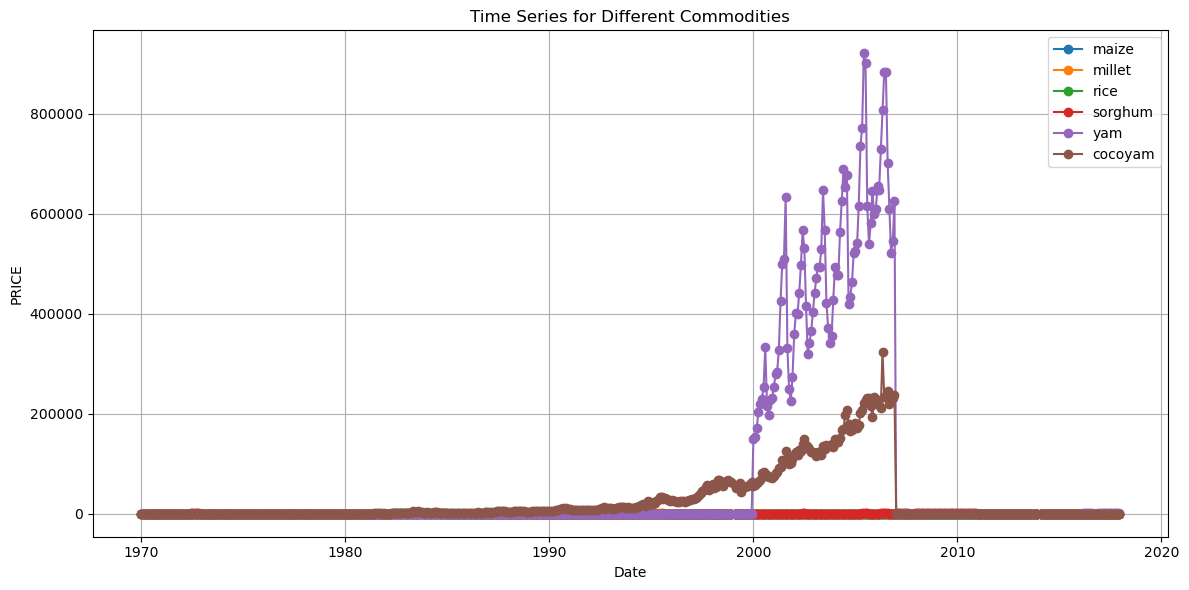

In [107]:
# List of commodities
commodities = ['maize', 'millet', 'rice', 'sorghum', 'yam', 'cocoyam']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot time series for each commodity
for commodity in commodities:
    # Filter data for the current commodity
    commodity_data = Prices[Prices['Commodity'] == commodity]
    
    # Plot the time series for the commodity
    ax.plot(commodity_data.index, commodity_data['PRICE'], marker='o', linestyle='-', label=commodity)

# Set title and labels
ax.set_title('Time Series for Different Commodities')
ax.set_xlabel('Date')
ax.set_ylabel('PRICE')

# Add legend
ax.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


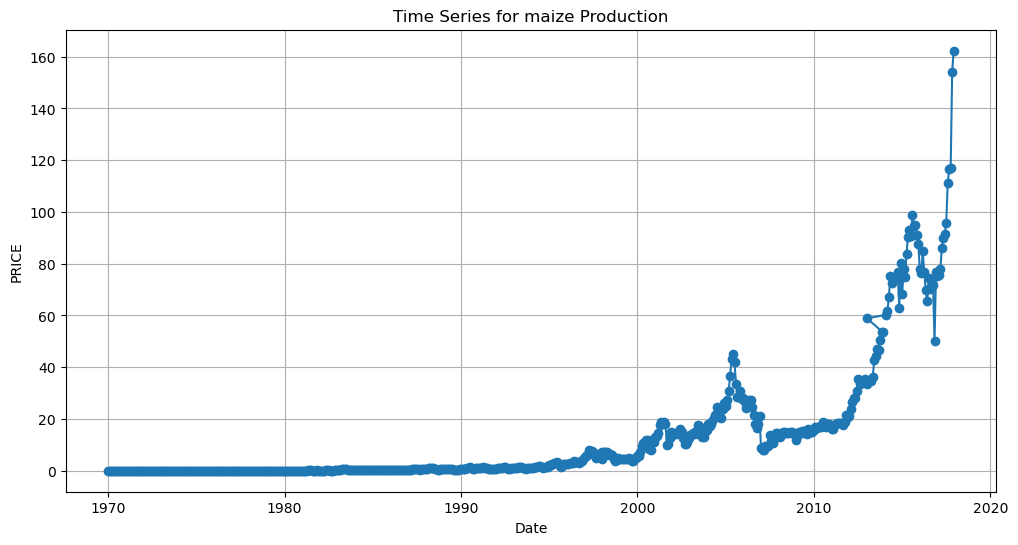

In [18]:
# Assign a fixed day (e.g., 1st day of the month)
Prices['day'] = 1

# Convert 'YEAR', 'MONTH', and 'day' columns to datetime format
Prices['date'] = pd.to_datetime(Prices[['Year', 'Month', 'day']])

# Set the 'date' column as the index
Prices.set_index('date', inplace=True)

# Filter data for a specific commodity (replace 'YourCommodity' with the actual commodity name)
commodity_name = 'maize'
commodity_data = Prices[Prices['Commodity'] == commodity_name]

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(commodity_data['PRICE'], marker='o', linestyle='-')
plt.title(f'Time Series for {commodity_name} Production')
plt.xlabel('Date')
plt.ylabel('PRICE')
plt.grid(True)
plt.show()



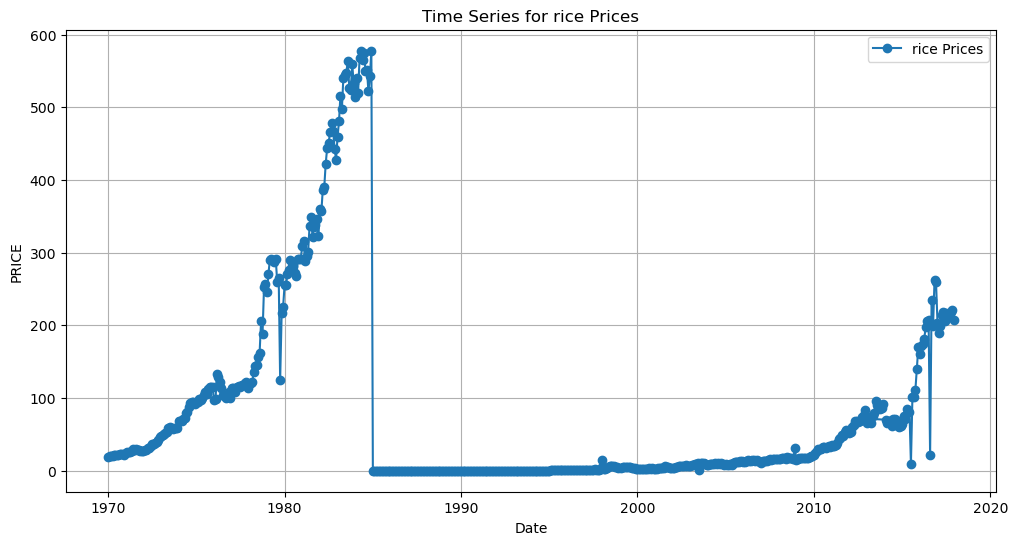

In [19]:
# Assign a fixed day (1st day of the month)
Prices['day'] = 1

# Convert 'YEAR', 'MONTH', and 'day' columns to datetime format
Prices['date'] = pd.to_datetime(Prices[['Year', 'Month', 'day']])

# Set the 'date' column as the index
Prices.set_index('date', inplace=True)

# Filter data for a specific commodity (replace 'YourCommodity' with the actual commodity name)
commodity_name = 'rice'
commodity_data = Prices[Prices['Commodity'] == commodity_name]

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(commodity_data['PRICE'], marker='o', linestyle='-', label=f'{commodity_name} Prices')
plt.title(f'Time Series for {commodity_name} Prices')
plt.xlabel('Date')
plt.ylabel('PRICE')
plt.legend()
plt.grid(True)
plt.show()


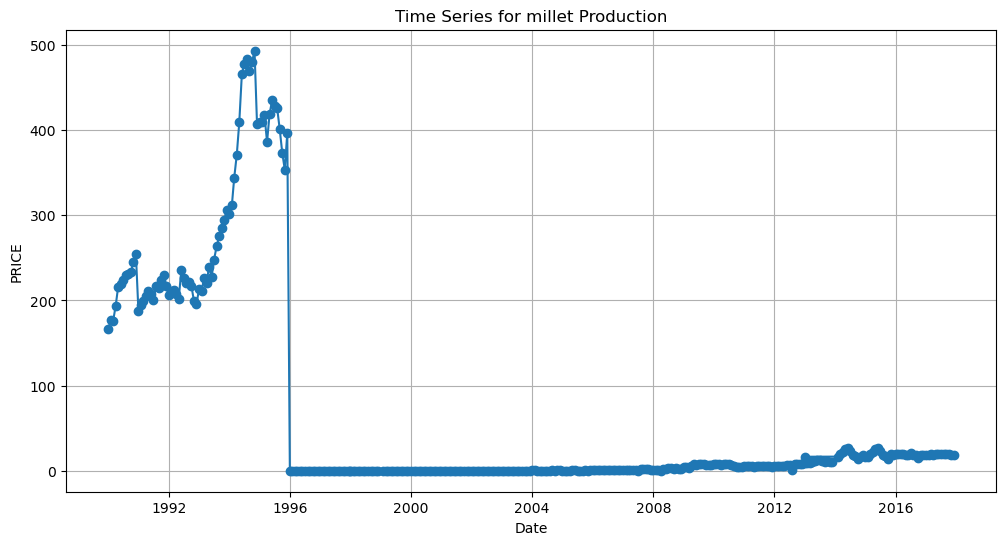

In [20]:
# Assign a fixed day (e.g., 1st day of the month)
Prices['day'] = 1

# Convert 'YEAR', 'MONTH', and 'day' columns to datetime format
Prices['date'] = pd.to_datetime(Prices[['Year', 'Month', 'day']])

# Set the 'date' column as the index
Prices.set_index('date', inplace=True)

# Filter data for a specific commodity
commodity_name = 'millet'
commodity_data = Prices[Prices['Commodity'] == commodity_name]

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(commodity_data['PRICE'], marker='o', linestyle='-')
plt.title(f'Time Series for {commodity_name} Production')
plt.xlabel('Date')
plt.ylabel('PRICE')
plt.grid(True)
plt.show()


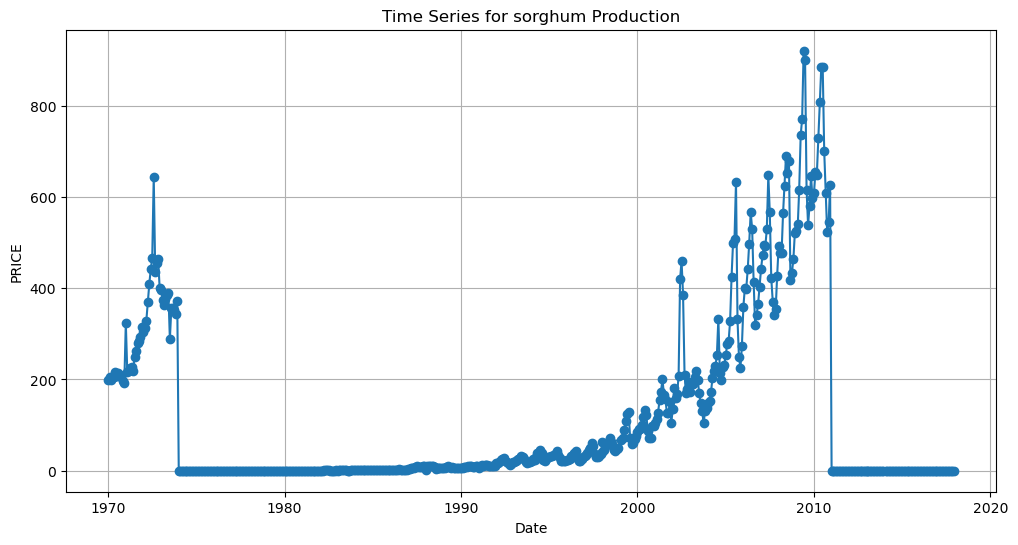

In [21]:
# Assign a fixed day (e.g., 1st day of the month)
Prices['day'] = 1

# Convert 'YEAR', 'MONTH', and 'day' columns to datetime format
Prices['date'] = pd.to_datetime(Prices[['Year', 'Month', 'day']])

# Set the 'date' column as the index
Prices.set_index('date', inplace=True)

# Filter data for a specific commodity (replace 'YourCommodity' with the actual commodity name)
commodity_name = 'sorghum'
commodity_data = Prices[Prices['Commodity'] == commodity_name]

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(commodity_data['PRICE'], marker='o', linestyle='-')
plt.title(f'Time Series for {commodity_name} Production')
plt.xlabel('Date')
plt.ylabel('PRICE')
plt.grid(True)
plt.show()


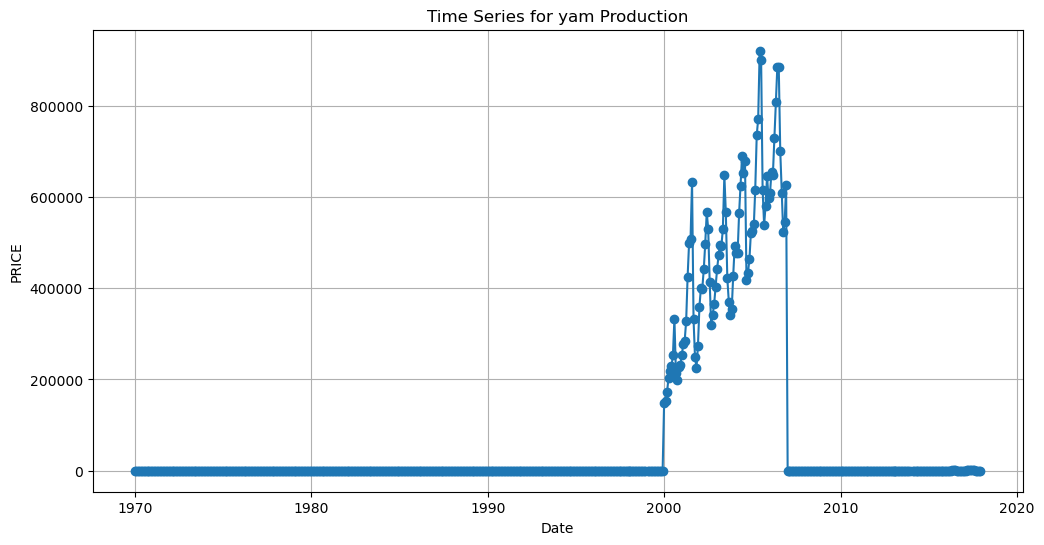

In [22]:
# Assign a fixed day (e.g., 1st day of the month)
Prices['day'] = 1

# Convert 'YEAR', 'MONTH', and 'day' columns to datetime format
Prices['date'] = pd.to_datetime(Prices[['Year', 'Month', 'day']])

# Set the 'date' column as the index
Prices.set_index('date', inplace=True)

# Filter data for a specific commodity
commodity_name = 'yam'
commodity_data = Prices[Prices['Commodity'] == commodity_name]

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(commodity_data['PRICE'], marker='o', linestyle='-')
plt.title(f'Time Series for {commodity_name} Production')
plt.xlabel('Date')
plt.ylabel('PRICE')
plt.grid(True)
plt.show()


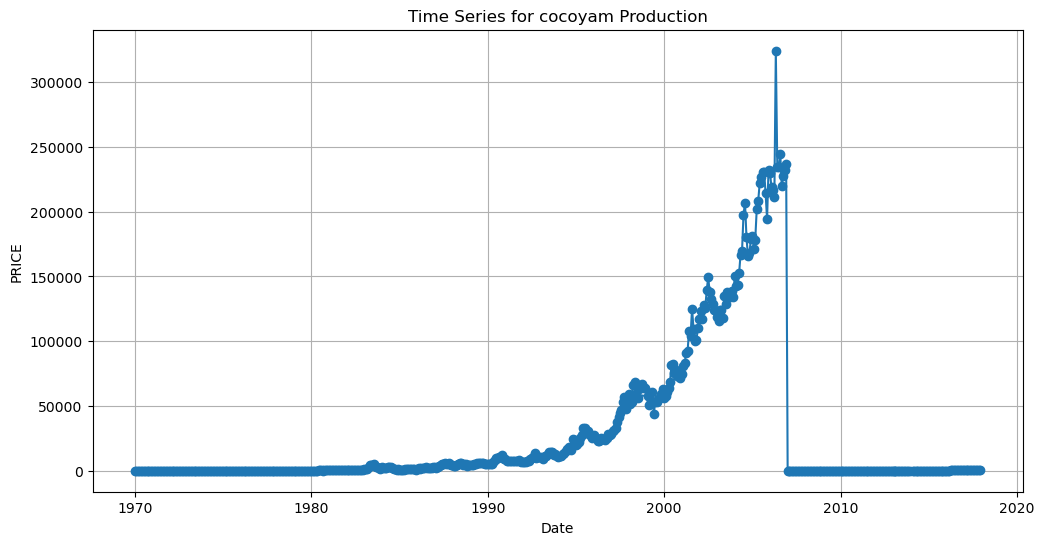

In [23]:
# Assign a fixed day (e.g., 1st day of the month)
Prices['day'] = 1

# Convert 'YEAR', 'MONTH', and 'day' columns to datetime format
Prices['date'] = pd.to_datetime(Prices[['Year', 'Month', 'day']])

# Set the 'date' column as the index
Prices.set_index('date', inplace=True)

# Filter data for a specific commodity 
commodity_name = 'cocoyam'
commodity_data = Prices[Prices['Commodity'] == commodity_name]

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(commodity_data['PRICE'], marker='o', linestyle='-')
plt.title(f'Time Series for {commodity_name} Production')
plt.xlabel('Date')
plt.ylabel('PRICE')
plt.grid(True)
plt.show()


In [24]:
# Calculate basic statistics for WEIGHT and PRICE columns per commodity
basic_stats_per_commodity = Prices.groupby('Commodity')[['Weight', 'PRICE']].describe()
basic_stats_per_commodity

Weight                                                 PRICE  \
           count   mean  std    min    25%    50%    75%    max  count   
Commodity                                                                
cocoyam    576.0   91.0  0.0   91.0   91.0   91.0   91.0   91.0  576.0   
maize      576.0  100.0  0.0  100.0  100.0  100.0  100.0  100.0  576.0   
millet     336.0   93.0  0.0   93.0   93.0   93.0   93.0   93.0  336.0   
rice       576.0  100.0  0.0  100.0  100.0  100.0  100.0  100.0  576.0   
sorghum    576.0  109.0  0.0  109.0  109.0  109.0  109.0  109.0  576.0   
yam        576.0  250.0  0.0  250.0  250.0  250.0  250.0  250.0  576.0   

                                                                    \
                   mean            std     min       25%       50%   
Commodity                                                            
cocoyam    27644.911215   56166.427701  5.0000  57.59250  750.0000   
maize         13.423251      24.172058  0.0009   0.08165    1.2800   
millet        65.234137     123.521944  0.0200   0.15750    5.2240   
rice          82.653231     134.985073  0.0100   0.88000   17.3630   
sorghum      116.546690     191.625170  0.0070   0.08000   10.2030   
yam        69836.542924  183074.770042  0.0500   5.15975   73.4905   

                                   
                  75%         max  
Commodity                          
cocoyam    20776.2500  324300.000  
maize         15.3875     162.327  
millet        19.8935     493.330  
rice          97.6790     577.730  
sorghum      172.0550     920.550  
yam          234.2700  920550.000

In [25]:
#For data quality issues and from visualization
#Data from 1970-1999 shall be dropped

In [26]:
# Filter out rows with years between 1970 and 1999
Prices_df = Prices[Prices['Year'] >= 2000]
display(Prices_df)

,Year,Month,Commodity,Weight,PRICE,day
date,,,,,,
2000-01-01,2000,1,maize,100,5.61,1
2000-02-01,2000,2,maize,100,5.73,1
2000-03-01,2000,3,maize,100,7.36,1
2000-04-01,2000,4,maize,100,9.45,1
2000-05-01,2000,5,maize,100,10.80,1
...,...,...,...,...,...,...
2017-08-01,2017,8,cocoyam,91,208.95,1
2017-09-01,2017,9,cocoyam,91,193.72,1
2017-10-01,2017,10,cocoyam,91,210.27,1


# CROPS

In [27]:
#Loading Crops data
excel_file_path = r'C:\Users\withl\Desktop\Final Project\production_estimates.xlsx'

# Read the Excel file into a pandas DataFrame
Crops = pd.read_excel(excel_file_path)

# Display the DataFrame
display(Crops)

,REGION,DISTRICT,YEAR,CROP,AREA (HA),YIELD (MT/HA),PRODUCTION (MT)
0,WESTERN,SHAMA AHANTA EAST,1993,MAIZE,366.0,0.95,348
1,WESTERN,WEST AHANTA,1993,MAIZE,1513.0,1,1513
2,WESTERN,MPORHOR WASSA EAST,1993,MAIZE,2948.0,1.08,3184
3,WESTERN,WASSA WEST,1993,MAIZE,3672.0,1,3672
4,WESTERN,EAST NZEMA,1993,MAIZE,1050.0,0.85,893
...,...,...,...,...,...,...,...
16070,NORTHERN REGION,MAMPRUGU MOAGDURI,2017,CASSAVA,900.0,7.95,7155
16071,NORTHERN REGION,YENDI,2017,CASSAVA,4790.0,13.59,65096.1
16072,NORTHERN REGION,MION,2017,CASSAVA,3831.0,6.96,26663.76
16073,NORTHERN REGION,TATALE SANGULI,2017,CASSAVA,5192.0,13.85,71909.2


In [28]:
#Checking the data
Crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16075 entries, 0 to 16074
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   REGION           16075 non-null  object 
 1   DISTRICT         16075 non-null  object 
 2   YEAR             16075 non-null  int64  
 3   CROP             16075 non-null  object 
 4   AREA (HA)        16075 non-null  float64
 5   YIELD (MT/HA)    16047 non-null  object 
 6   PRODUCTION (MT)  16072 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 879.2+ KB


In [29]:
#Checking for null values
Crops.isna().sum()

REGION              0
DISTRICT            0
YEAR                0
CROP                0
AREA (HA)           0
YIELD (MT/HA)      28
PRODUCTION (MT)     3
dtype: int64

In [30]:
#checking for data types
Crops.dtypes

REGION              object
DISTRICT            object
YEAR                 int64
CROP                object
AREA (HA)          float64
YIELD (MT/HA)       object
PRODUCTION (MT)     object
dtype: object

In [31]:
#Checking for null values in the rows
nan_rows = Crops[Crops.isnull().any(axis=1)]
nan_rows
#nan_rows.shape

,REGION,DISTRICT,YEAR,CROP,AREA (HA),YIELD (MT/HA),PRODUCTION (MT)
116,VOLTA,KETE-KRACHI,1993,YAM,7600.00,NaN,-
163,ASHANTI,SEKYERE EAST,1993,YAM,400.00,NaN,-
168,ASHANTI,ASANTE AKIM SOUTH,1993,YAM,400.00,NaN,-
410,BRONG AHAFO,JAMAN,1993,PLANTAIN,500.00,NaN,-
875,BRONG AHAFO,ATEBUBU,1994,PLANTAIN,300.00,NaN,-
1240,VOLTA,KPANDO,1995,PLANTAIN,395.00,NaN,-
1241,VOLTA,HOHOE MUNICIPAL,1995,PLANTAIN,345.00,NaN,-
1343,UPPER WEST,WA,1995,GROUNDNUT,14200.00,NaN,-
1657,UPPER WEST,LAWRA,1996,RICE,10.00,NaN,-
3123,BRONG AHAFO,ATEBUBU,1999,RICE,1380.00,NaN,-


In [32]:
#Checking for data types
Crops.dtypes

REGION              object
DISTRICT            object
YEAR                 int64
CROP                object
AREA (HA)          float64
YIELD (MT/HA)       object
PRODUCTION (MT)     object
dtype: object

In [33]:
# Dropping rows with missing values
Crops_cleaned = Crops.dropna()

# Display the shape of the cleaned DataFrame
print("Shape after dropping rows with missing values:", Crops_cleaned.shape)


Shape after dropping rows with missing values: (16045, 7)


In [34]:
#Checking for null values
Crops_cleaned.isnull().sum()

REGION             0
DISTRICT           0
YEAR               0
CROP               0
AREA (HA)          0
YIELD (MT/HA)      0
PRODUCTION (MT)    0
dtype: int64

In [35]:
#Checking for duplicated values
Crops_cleaned.duplicated().sum()

0

In [36]:
#changing numeric to numeric data type
Crops_cleaned['YIELD (MT/HA)'] = pd.to_numeric(Crops_cleaned['YIELD (MT/HA)'], errors='coerce')
Crops_cleaned['PRODUCTION (MT)'] = pd.to_numeric(Crops_cleaned['PRODUCTION (MT)'], errors='coerce')

C:\Users\withl\AppData\Local\Temp\ipykernel_36452\2235494149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Crops_cleaned['YIELD (MT/HA)'] = pd.to_numeric(Crops_cleaned['YIELD (MT/HA)'], errors='coerce')
C:\Users\withl\AppData\Local\Temp\ipykernel_36452\2235494149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Crops_cleaned['PRODUCTION (MT)'] = pd.to_numeric(Crops_cleaned['PRODUCTION (MT)'], errors='coerce')


In [37]:
#Checking data types
Crops_cleaned.dtypes

REGION              object
DISTRICT            object
YEAR                 int64
CROP                object
AREA (HA)          float64
YIELD (MT/HA)      float64
PRODUCTION (MT)    float64
dtype: object

In [38]:
#Renaming columns for easier readability
Crops_cleaned.rename(columns={'REGION': 'Region', 'DISTRICT': 'District','YEAR':'Year', 'CROP':'Commodity', 'AREA (HA) ': 'Area (HA)','YIELD (MT/HA)':'Yield (MT/HA)' ,'PRODUCTION (MT)':'Production (MT)' }, inplace=True)
Crops_cleaned.head()

C:\Users\withl\AppData\Local\Temp\ipykernel_36452\3345387199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Crops_cleaned.rename(columns={'REGION': 'Region', 'DISTRICT': 'District','YEAR':'Year', 'CROP':'Commodity', 'AREA (HA) ': 'Area (HA)','YIELD (MT/HA)':'Yield (MT/HA)' ,'PRODUCTION (MT)':'Production (MT)' }, inplace=True)


,Region,District,Year,Commodity,AREA (HA),Yield (MT/HA),Production (MT)
0,WESTERN,SHAMA AHANTA EAST,1993,MAIZE,366.0,0.95,348.0
1,WESTERN,WEST AHANTA,1993,MAIZE,1513.0,1.00,1513.0
2,WESTERN,MPORHOR WASSA EAST,1993,MAIZE,2948.0,1.08,3184.0
3,WESTERN,WASSA WEST,1993,MAIZE,3672.0,1.00,3672.0
4,WESTERN,EAST NZEMA,1993,MAIZE,1050.0,0.85,893.0


In [39]:
#Checking for distinct values
Crops_cleaned['Region'].unique()

array(['WESTERN', 'CENTRAL', 'VOLTA', 'ASHANTI', 'EASTERN', 'BRONG AHAFO',
       'UPPER WEST', 'UPPER EAST', 'GREATER ACCRA', 'NORTHERN REGION'],
      dtype=object)

In [40]:
# Replace 'Northern Region' with 'Northern'
Crops_cleaned['Region'] = Crops_cleaned['Region'].str.replace('NORTHERN REGION', 'NORTHERN')

# Check the unique values after replacement
unique_regions = Crops_cleaned['Region'].unique()
print(unique_regions)

['WESTERN' 'CENTRAL' 'VOLTA' 'ASHANTI' 'EASTERN' 'BRONG AHAFO'
 'UPPER WEST' 'UPPER EAST' 'GREATER ACCRA' 'NORTHERN']


C:\Users\withl\AppData\Local\Temp\ipykernel_36452\2568031449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Crops_cleaned['Region'] = Crops_cleaned['Region'].str.replace('NORTHERN REGION', 'NORTHERN')


In [41]:
#Checking for distinct values

Crops_cleaned['Year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [42]:
#Checking for distinct values

Crops_cleaned['Commodity'].unique()

array(['MAIZE', 'RICE', 'CASSAVA', 'YAM', 'COCOYAM', 'PLANTAIN',
       'GROUNDNUT', 'SORGHUM', 'MILLET', 'COWPEA', 'SOYABEAN'],
      dtype=object)

In [43]:
# Convert 'COMMODITY' column values to lowercase
Crops_cleaned['Commodity'] = Crops_cleaned['Commodity'].str.lower()
Crops_cleaned['District'] = Crops_cleaned['District'].str.lower()
Crops_cleaned['Region'] = Crops_cleaned['Region'].str.lower()

Crops_cleaned.head()

C:\Users\withl\AppData\Local\Temp\ipykernel_36452\3842241512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Crops_cleaned['Commodity'] = Crops_cleaned['Commodity'].str.lower()
C:\Users\withl\AppData\Local\Temp\ipykernel_36452\3842241512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Crops_cleaned['District'] = Crops_cleaned['District'].str.lower()
C:\Users\withl\AppData\Local\Temp\ipykernel_36452\3842241512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,Region,District,Year,Commodity,AREA (HA),Yield (MT/HA),Production (MT)
0,western,shama ahanta east,1993,maize,366.0,0.95,348.0
1,western,west ahanta,1993,maize,1513.0,1.00,1513.0
2,western,mporhor wassa east,1993,maize,2948.0,1.08,3184.0
3,western,wassa west,1993,maize,3672.0,1.00,3672.0
4,western,east nzema,1993,maize,1050.0,0.85,893.0


In [44]:
#Descriptive statsictics of data
Crops_cleaned.describe()

,Year,AREA (HA),Yield (MT/HA),Production (MT)
count,16045.000000,16045.000000,16002.000000,1.600200e+04
mean,2006.869554,4453.183614,6.579517,3.173264e+04
std,7.250942,5484.085234,6.114397,6.041856e+04
min,1993.000000,0.020000,0.070000,2.000000e-02
25%,2001.000000,611.000000,1.500000,2.204050e+03
50%,2008.000000,2640.000000,5.040000,8.618070e+03
75%,2013.000000,6437.650000,10.000000,3.262275e+04
max,2017.000000,66288.000000,150.000000,1.241400e+06


In [45]:
#find the top crop-producing regions based on the highest total crop production
# Group by 'REGION' and calculate the sum of total crop production
region_production = Crops_cleaned.groupby('Region')['Production (MT)'].sum()

# Sort the regions based on total production in descending order
top_regions = region_production.sort_values(ascending=False)

# Display the top crop-producing regions
print("Top Crop Producing Regions:")
print(top_regions)

Top Crop Producing Regions:
Region
brong ahafo      1.332165e+08
eastern          1.254142e+08
ashanti          8.610447e+07
central          4.799429e+07
volta            4.439959e+07
western          4.076722e+07
upper west       1.881681e+07
upper east       9.057821e+06
northern         1.872356e+06
greater accra    1.425514e+05
Name: Production (MT), dtype: float64


In [46]:
#find the top crop-producing area based on the highest total crop production
area_production = Crops_cleaned.groupby('Region')['AREA (HA)'].sum()

# Sort the regions based on total production in descending order
large_area = area_production.sort_values(ascending=False)

# Display the top crop-producing regions
print("Top Crop Producing Area by size:")
print(large_area)


Top Crop Producing Area by size:
Region
brong ahafo      13155869.30
eastern          12739314.87
ashanti          11079030.42
upper west        9559887.84
upper east        8154912.98
western           6131056.26
central           5557170.26
volta             4729736.15
northern           323453.16
greater accra       20899.84
Name: AREA (HA), dtype: float64


In [47]:
# Group by 'REGION' and 'DISTRICT' and calculate the sum of total crop production
district_production = Crops_cleaned.groupby(['Region', 'District'])['Production (MT)'].sum()

# Find the top-producing district within each region
top_districts = district_production.groupby('Region', group_keys=False).nlargest(1)

# Display the top-producing districts within each region
print("Top-Producing Districts Within Each Region:")
print(top_districts)

Top-Producing Districts Within Each Region:
Region         District                      
ashanti        ahafo ano south                    7015626.82
brong ahafo    sene                              13715124.57
central        awutu-efutu-senya                  5465673.74
eastern        fanteakwa                         12718514.75
greater accra  shai osudoku district assembly       45081.00
northern       west gonja                          379436.00
upper east     bolgatanga municipal               1555423.91
upper west     nadowli                            3640253.19
volta          nkwanta                            9717815.90
western        sefwi-wiawso                       6365667.52
Name: Production (MT), dtype: float64


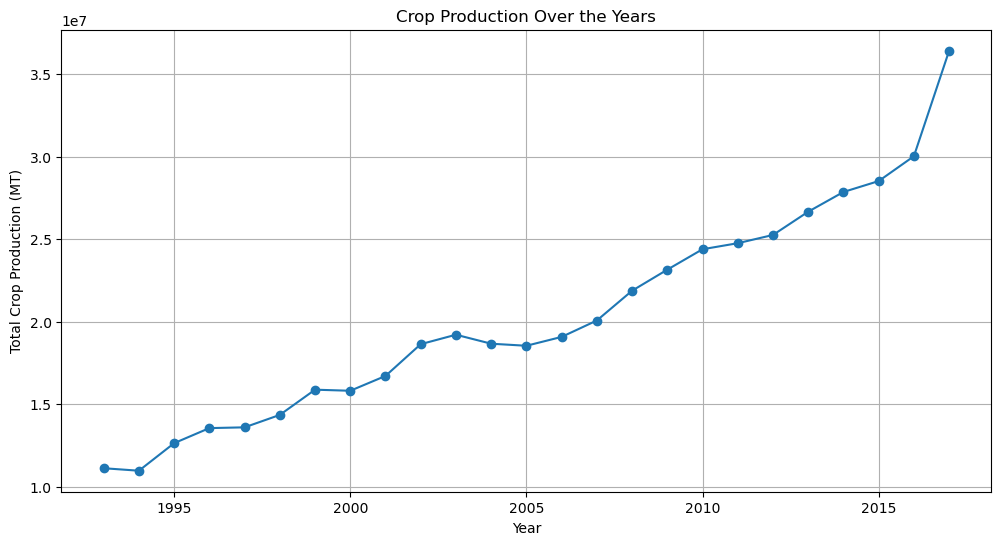

In [48]:
#how crop production has changed over the years

# Group by 'YEAR' and calculate the sum of total crop production for each year
yearly_production = Crops_cleaned.groupby('Year')['Production (MT)'].sum()

# Plot the time series of crop production over the years
plt.figure(figsize=(12, 6))
plt.plot(yearly_production.index, yearly_production.values, marker='o', linestyle='-')
plt.title('Crop Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Crop Production (MT)')
plt.grid(True)
Splt.show()

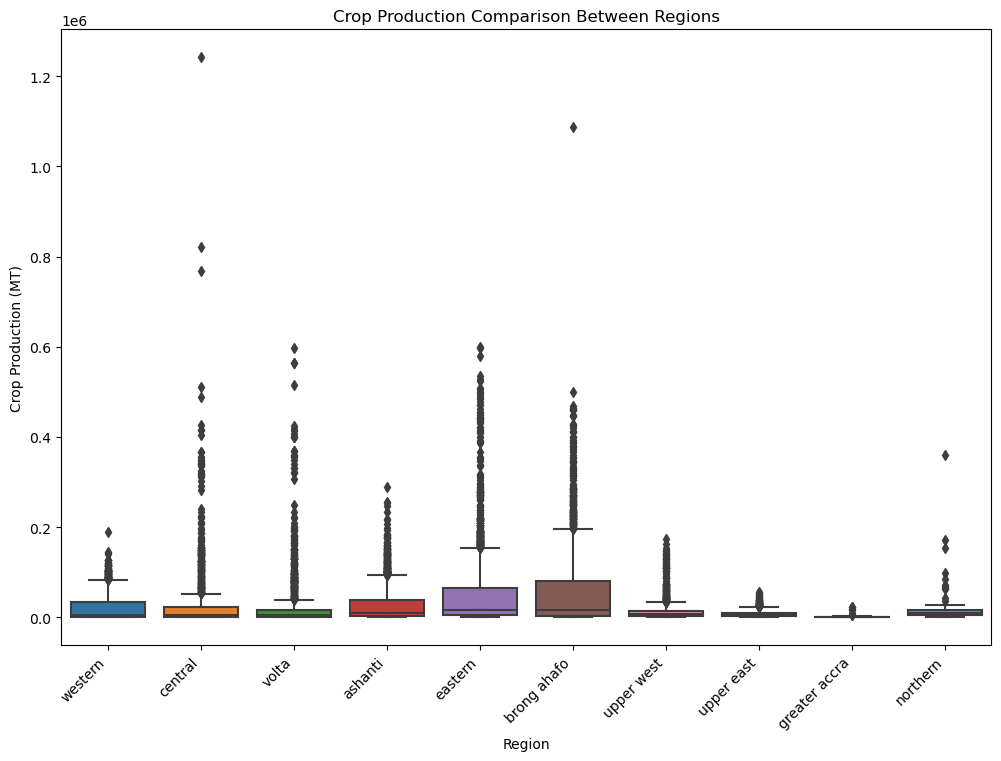

In [49]:
#Are there significant differences in crop production between regions
#Create a boxplot to compare crop production between regions
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Production (MT)', data=Crops_cleaned)
plt.title('Crop Production Comparison Between Regions')
plt.xlabel('Region')
plt.ylabel('Crop Production (MT)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [50]:
#finding correlation between Yield and Production
correlation_1 = Crops_cleaned['Yield (MT/HA)'].corr(Crops_cleaned['Production (MT)'])
correlation_1

0.6229380572960442

In [51]:
#finding correlation between Area and Production
correlation_2 = Crops_cleaned['AREA (HA)'].corr(Crops_cleaned['Production (MT)'])
correlation_2

0.5392996863069811

In [52]:
#finding correlation between Area and Yield

correlation_3 = Crops_cleaned['Yield (MT/HA)'].corr(Crops_cleaned['AREA (HA)'])
correlation_3

0.06539981306708843

In [53]:
#the average yield vary between regions
# Group by 'REGION' and calculate the mean yield for each region
average_yield_by_region = Crops_cleaned.groupby('Region')['Yield (MT/HA)'].mean()

# Display the average yield for each region
print("Average Yield by Region:")
print(average_yield_by_region)

Average Yield by Region:
Region
ashanti          7.449452
brong ahafo      8.453798
central          6.513425
eastern          9.315113
greater accra    6.921964
northern         5.156410
upper east       1.210352
upper west       2.700664
volta            6.597422
western          5.386882
Name: Yield (MT/HA), dtype: float64


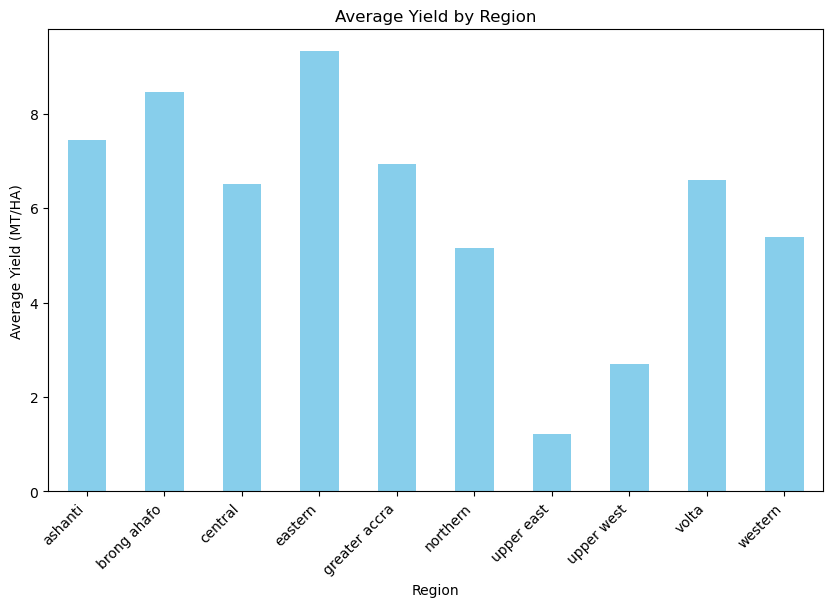

In [54]:
# Plot the average yield for each region
plt.figure(figsize=(10, 6))
average_yield_by_region.plot(kind='bar', color='skyblue')
plt.title('Average Yield by Region')
plt.xlabel('Region')
plt.ylabel('Average Yield (MT/HA)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [55]:
#crops are the most commonly cultivated
# Group by 'CROP' and calculate the count and sum of total production for each crop
crop_count = Crops_cleaned.groupby('Commodity')['Production (MT)'].agg(['count', 'sum'])

# Sort crops by count of occurrences in descending order
crop_count = crop_count.sort_values(by='count', ascending=False)

# Display the most commonly cultivated crops and their contribution to total production
print("Most Commonly Cultivated Crops and Their Contribution to Total Production:")
print(crop_count)

Most Commonly Cultivated Crops and Their Contribution to Total Production:
           count           sum
Commodity                     
maize       2805  3.048987e+07
cassava     2446  2.616844e+08
yam         2309  8.671912e+07
plantain    2168  6.915521e+07
cocoyam     2106  3.839939e+07
rice        2010  6.026772e+06
groundnut    552  5.537869e+06
cowpea       522  1.716202e+06
sorghum      472  4.903221e+06
millet       361  2.747085e+06
soyabean     251  4.066018e+05


C:\Users\withl\AppData\Local\Temp\ipykernel_36452\3754659315.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


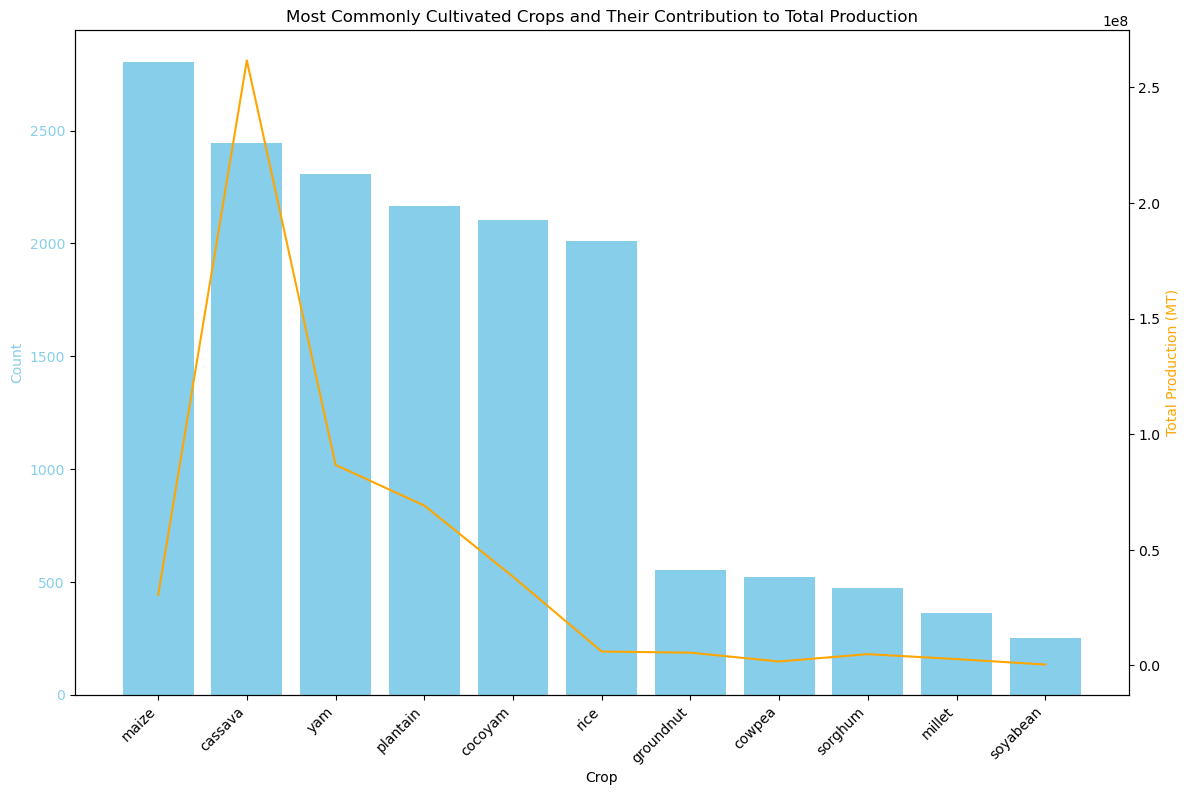

In [56]:
# Group by 'CROP' and calculate the count and sum of total production for each crop
crop_statistics = Crops_cleaned.groupby('Commodity')['Production (MT)'].agg(['count', 'sum'])

# Sort crops by count of occurrences in descending order
crop_statistics = crop_statistics.sort_values(by='count', ascending=False)

# Plot the most commonly cultivated crops and their contribution to total production
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for count of occurrences
ax1.bar(crop_statistics.index, crop_statistics['count'], color='skyblue', label='Count')
ax1.set_xlabel('Crop')
ax1.set_ylabel('Count', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Rotate x-axis labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Line plot for total production
ax2 = ax1.twinx()
ax2.plot(crop_statistics.index, crop_statistics['sum'], color='orange', label='Total Production (MT)')
ax2.set_ylabel('Total Production (MT)', color='orange')

fig.tight_layout()
plt.title('Most Commonly Cultivated Crops and Their Contribution to Total Production')
plt.show()



In [57]:
Crops_cleaned.head()

,Region,District,Year,Commodity,AREA (HA),Yield (MT/HA),Production (MT)
0,western,shama ahanta east,1993,maize,366.0,0.95,348.0
1,western,west ahanta,1993,maize,1513.0,1.00,1513.0
2,western,mporhor wassa east,1993,maize,2948.0,1.08,3184.0
3,western,wassa west,1993,maize,3672.0,1.00,3672.0
4,western,east nzema,1993,maize,1050.0,0.85,893.0


In [58]:
#Filtering data above the year 2000
Crops_df=Crops_cleaned[Crops_cleaned['Year']>=2000]
display(Crops_df)

,Region,District,Year,Commodity,AREA (HA),Yield (MT/HA),Production (MT)
3357,western,shama ahanta east,2000,maize,559.0,1.20,671.00
3358,western,west ahanta,2000,maize,1496.0,1.23,1840.00
3359,western,mporhor wassa east,2000,maize,4000.0,1.34,5360.00
3360,western,wassa west,2000,maize,3662.0,1.30,4761.00
3361,western,east nzema,2000,maize,1060.0,1.30,1378.00
...,...,...,...,...,...,...,...
16070,northern,mamprugu moagduri,2017,cassava,900.0,7.95,7155.00
16071,northern,yendi,2017,cassava,4790.0,13.59,65096.10
16072,northern,mion,2017,cassava,3831.0,6.96,26663.76
16073,northern,tatale sanguli,2017,cassava,5192.0,13.85,71909.20


In [59]:
#finding distinct values

Crops_df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [60]:
Prices_df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [61]:
Crops_df['Commodity'].unique()

array(['maize', 'rice', 'cassava', 'yam', 'cocoyam', 'plantain',
       'sorghum', 'groundnut', 'millet', 'cowpea', 'soyabean'],
      dtype=object)

In [62]:
Prices_df['Commodity'].unique()

array(['maize', 'millet', 'rice', 'sorghum', 'yam', 'cocoyam'],
      dtype=object)

In [63]:
#lets merge the Crops and price datasets

In [64]:
# Merge the two DataFrames based on Year and Commodity columns
merged_df = pd.merge(Prices_df, Crops_df, on=['Year', 'Commodity'])

display(merged_df)

,Year,Month,Commodity,Weight,PRICE,day,Region,District,AREA (HA),Yield (MT/HA),Production (MT)
0,2000,1,maize,100,5.61,1,western,shama ahanta east,559.0,1.20,671.00
1,2000,1,maize,100,5.61,1,western,west ahanta,1496.0,1.23,1840.00
2,2000,1,maize,100,5.61,1,western,mporhor wassa east,4000.0,1.34,5360.00
3,2000,1,maize,100,5.61,1,western,wassa west,3662.0,1.30,4761.00
4,2000,1,maize,100,5.61,1,western,east nzema,1060.0,1.30,1378.00
...,...,...,...,...,...,...,...,...,...,...,...
94963,2017,12,cocoyam,91,195.17,1,ashanti,obuasi municipal (adansi west),437.0,4.82,2106.34
94964,2017,12,cocoyam,91,195.17,1,ashanti,adansi south,2382.0,6.62,15768.84
94965,2017,12,cocoyam,91,195.17,1,ashanti,asante akim north,1254.0,6.84,8577.36
94966,2017,12,cocoyam,91,195.17,1,ashanti,asante akim south,8043.0,5.64,45362.52


In [65]:
merged_df.isna().sum()

Year                 0
Month                0
Commodity            0
Weight               0
PRICE                0
day                  0
Region               0
District             0
AREA (HA)            0
Yield (MT/HA)      190
Production (MT)    190
dtype: int64

In [66]:
null_rows = merged_df[merged_df.isnull().any(axis=1)]
null_rows
#null_rows.shape

,Year,Month,Commodity,Weight,PRICE,day,Region,District,AREA (HA),Yield (MT/HA),Production (MT)
30826,2002,1,rice,100,3.88,1,volta,south tongu (sogakope),100.0,NaN,NaN
30863,2002,1,rice,100,3.88,1,brong ahafo,atebubu,1685.0,NaN,NaN
30895,2002,2,rice,100,4.03,1,volta,south tongu (sogakope),100.0,NaN,NaN
30932,2002,2,rice,100,4.03,1,brong ahafo,atebubu,1685.0,NaN,NaN
30964,2002,3,rice,100,4.45,1,volta,south tongu (sogakope),100.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
93033,2016,8,cocoyam,91,215.61,1,brong ahafo,jaman south,2520.0,NaN,NaN
93153,2016,9,cocoyam,91,209.91,1,brong ahafo,jaman south,2520.0,NaN,NaN
93273,2016,10,cocoyam,91,210.83,1,brong ahafo,jaman south,2520.0,NaN,NaN
93393,2016,11,cocoyam,91,194.02,1,brong ahafo,jaman south,2520.0,NaN,NaN


In [67]:
#flitering to see if previous years had some yield
fil= merged_df[(merged_df['Year']==2002) & (merged_df['Commodity']=='cocoyam') & (merged_df['Region']=='central')& (merged_df['District']=='gomoa')]
                          
fil

,Year,Month,Commodity,Weight,PRICE,day,Region,District,AREA (HA),Yield (MT/HA),Production (MT)


In [68]:
merged_df['Yield (MT/HA)'].isna().sum()/merged_df.shape[0]

0.002000673911212198

In [69]:
# Dropping rows with missing values
df_cleaned = merged_df.dropna()

In [70]:
df_cleaned.dtypes

Year                 int64
Month                int64
Commodity           object
Weight               int64
PRICE              float64
day                  int64
Region              object
District            object
AREA (HA)          float64
Yield (MT/HA)      float64
Production (MT)    float64
dtype: object

In [71]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94778 entries, 0 to 94967
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             94778 non-null  int64  
 1   Month            94778 non-null  int64  
 2   Commodity        94778 non-null  object 
 3   Weight           94778 non-null  int64  
 4   PRICE            94778 non-null  float64
 5   day              94778 non-null  int64  
 6   Region           94778 non-null  object 
 7   District         94778 non-null  object 
 8   AREA (HA)        94778 non-null  float64
 9   Yield (MT/HA)    94778 non-null  float64
 10  Production (MT)  94778 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 8.7+ MB


In [72]:
#Checking for duplicates
df_cleaned.duplicated().sum()

0

In [73]:
#Droping some irrelavant column eg day
df_cleaned.drop(columns=['day'],inplace=True)


C:\Users\withl\AppData\Local\Temp\ipykernel_36452\1774646318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['day'],inplace=True)


In [74]:
df_cleaned.head()

,Year,Month,Commodity,Weight,PRICE,Region,District,AREA (HA),Yield (MT/HA),Production (MT)
0,2000,1,maize,100,5.61,western,shama ahanta east,559.0,1.20,671.0
1,2000,1,maize,100,5.61,western,west ahanta,1496.0,1.23,1840.0
2,2000,1,maize,100,5.61,western,mporhor wassa east,4000.0,1.34,5360.0
3,2000,1,maize,100,5.61,western,wassa west,3662.0,1.30,4761.0
4,2000,1,maize,100,5.61,western,east nzema,1060.0,1.30,1378.0


In [75]:
df_cleaned.shape

(94778, 10)

In [76]:
#lets filter data from 2008 to match available rainfall data

crops_fil=df_cleaned[df_cleaned['Year']>=2008]
display(crops_fil)

,Year,Month,Commodity,Weight,PRICE,Region,District,AREA (HA),Yield (MT/HA),Production (MT)
9540,2008,1,maize,100,13.694,western,shama ahanta east,1099.0,1.15,1263.85
9541,2008,1,maize,100,13.694,western,west ahanta,1433.0,1.19,1705.27
9542,2008,1,maize,100,13.694,western,mporhor wassa east,2034.0,1.32,2684.88
9543,2008,1,maize,100,13.694,western,wassa west,2204.0,1.20,2644.80
9544,2008,1,maize,100,13.694,western,east nzema,1550.0,1.38,2139.00
...,...,...,...,...,...,...,...,...,...,...
94963,2017,12,cocoyam,91,195.170,ashanti,obuasi municipal (adansi west),437.0,4.82,2106.34
94964,2017,12,cocoyam,91,195.170,ashanti,adansi south,2382.0,6.62,15768.84
94965,2017,12,cocoyam,91,195.170,ashanti,asante akim north,1254.0,6.84,8577.36
94966,2017,12,cocoyam,91,195.170,ashanti,asante akim south,8043.0,5.64,45362.52


# Weather

In [77]:
file_path_5= "C:\\Users\\withl\\Desktop\\Final Project\\RAINFALL (1).csv"
rainfall=pd.read_csv(file_path_5)
rainfall.head()

,YEAR,REGION,TOTAL RAINFALL(MM)
0,2008,WESTERN,1518
1,2008,CENTRAL,1361
2,2008,GREATER ACCRA,914
3,2008,VOLTA,1436
4,2008,EASTERN,1454


In [78]:
rainfall.shape

(100, 3)

In [79]:
rainfall.isna().sum()

YEAR                  0
REGION                0
TOTAL RAINFALL(MM)    0
dtype: int64

In [80]:
rainfall['YEAR'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64)

In [81]:
rainfall['REGION'].unique()

array(['WESTERN', 'CENTRAL', 'GREATER ACCRA', 'VOLTA', 'EASTERN',
       'ASHANTI', 'BRONG AHAFO', 'NORTHERN', 'UPPER EAST', 'UPPER WEST'],
      dtype=object)

In [82]:
rainfall.dtypes

YEAR                   int64
REGION                object
TOTAL RAINFALL(MM)     int64
dtype: object

In [83]:
rainfall['TOTAL RAINFALL(MM)'].unique()

array([1518, 1361,  914, 1436, 1454, 1412, 1366, 1223,  902, 1171, 1385,
       1195,  805, 1212, 1211, 1380, 1148, 1292,  884, 1086, 1749, 1359,
        871, 1009, 1477, 1397, 1251,  984,  630, 1445, 1144,  812,  928,
       1337, 1170,  823, 1083,  665,  523, 1298, 1029,  646, 1061, 1204,
       1224, 1049, 1002,  956, 1136, 1025,  920,  365, 1075, 1080, 1215,
       1814, 1066,  997,  434, 1654, 1447,  777, 1368, 1271, 1381, 1239,
       1084,  707,  300, 1051,  689, 1213,  999, 1048,  870,  918,  724,
       1268,  894,  786, 1085,  790,  852,  860,  503,  448, 1780, 1551,
        833, 1189, 1547, 1303, 1017,  857,  747], dtype=int64)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


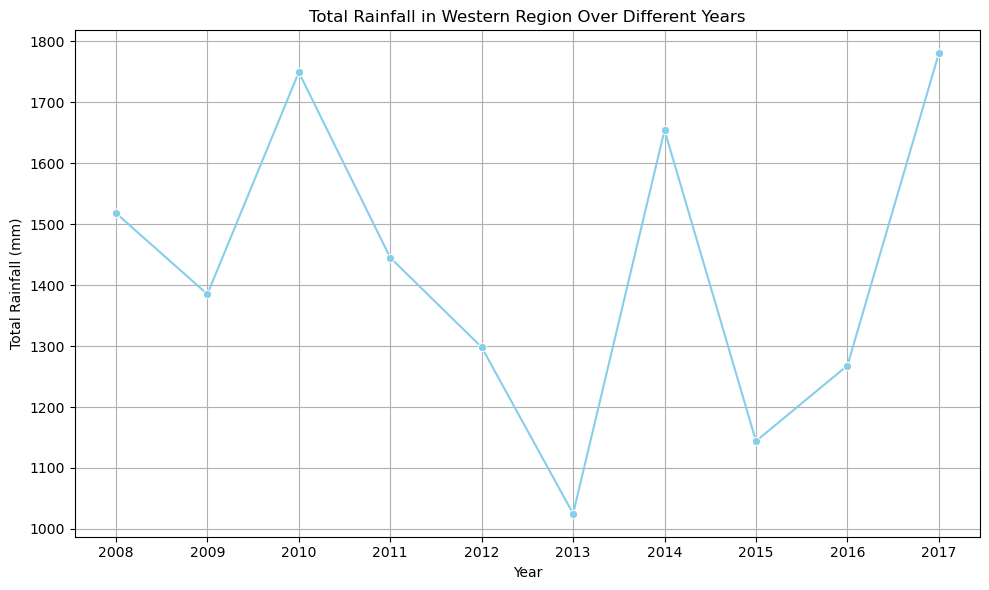

In [84]:
# Filter DataFrame for the region of interest
region_df = rainfall[rainfall['REGION'] == 'WESTERN']

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=region_df, x='YEAR', y='TOTAL RAINFALL(MM)', marker='o', color='skyblue')
plt.title(f'Total Rainfall in Western Region Over Different Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(region_df['YEAR'])
plt.grid(True)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


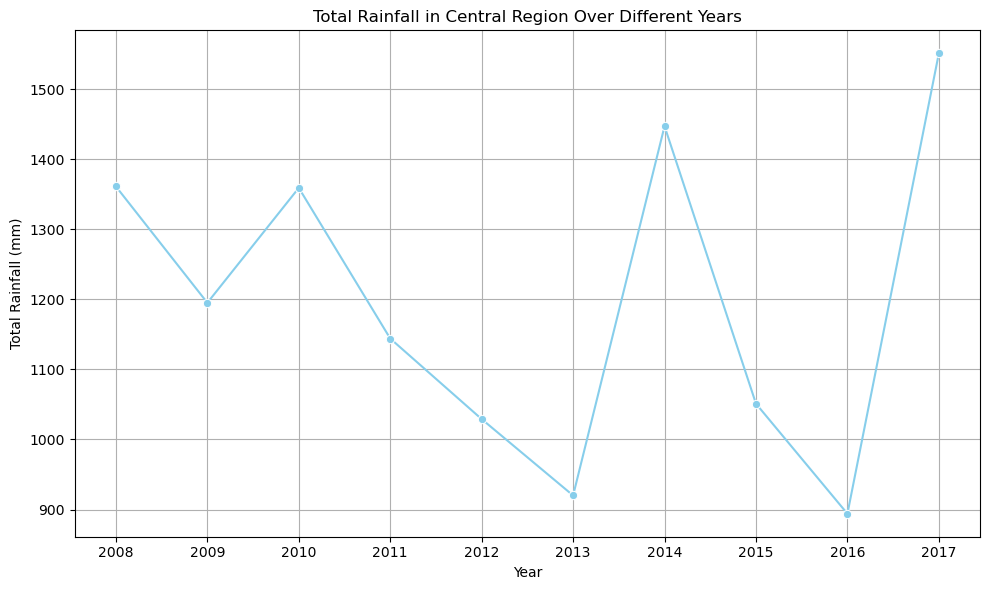

In [85]:
region = rainfall[rainfall['REGION'] == 'CENTRAL']

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=region, x='YEAR', y='TOTAL RAINFALL(MM)', marker='o', color='skyblue')
plt.title(f'Total Rainfall in Central Region Over Different Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(region['YEAR'])
plt.grid(True)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


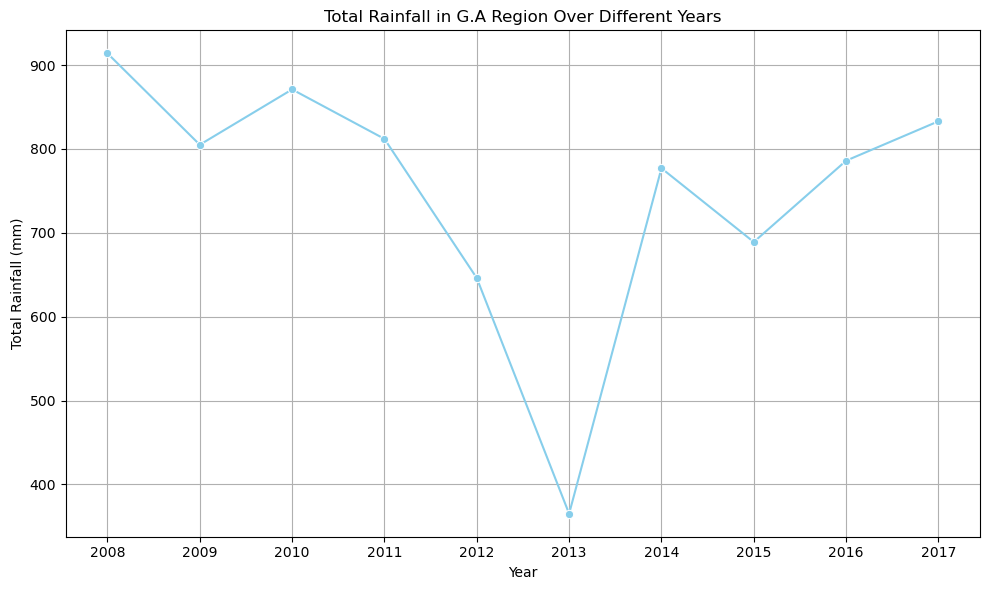

In [86]:
region_df = rainfall[rainfall['REGION'] == 'GREATER ACCRA']

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=region_df, x='YEAR', y='TOTAL RAINFALL(MM)', marker='o', color='skyblue')
plt.title(f'Total Rainfall in G.A Region Over Different Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(region_df['YEAR'])
plt.grid(True)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


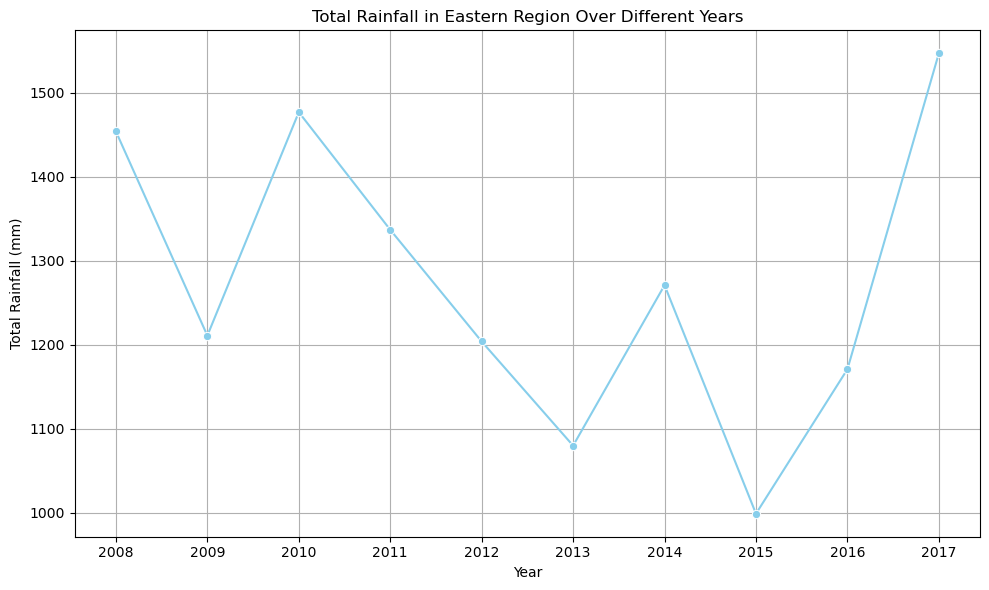

In [87]:
region_df = rainfall[rainfall['REGION'] == 'EASTERN']

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=region_df, x='YEAR', y='TOTAL RAINFALL(MM)', marker='o', color='skyblue')
plt.title(f'Total Rainfall in Eastern Region Over Different Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(region_df['YEAR'])
plt.grid(True)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


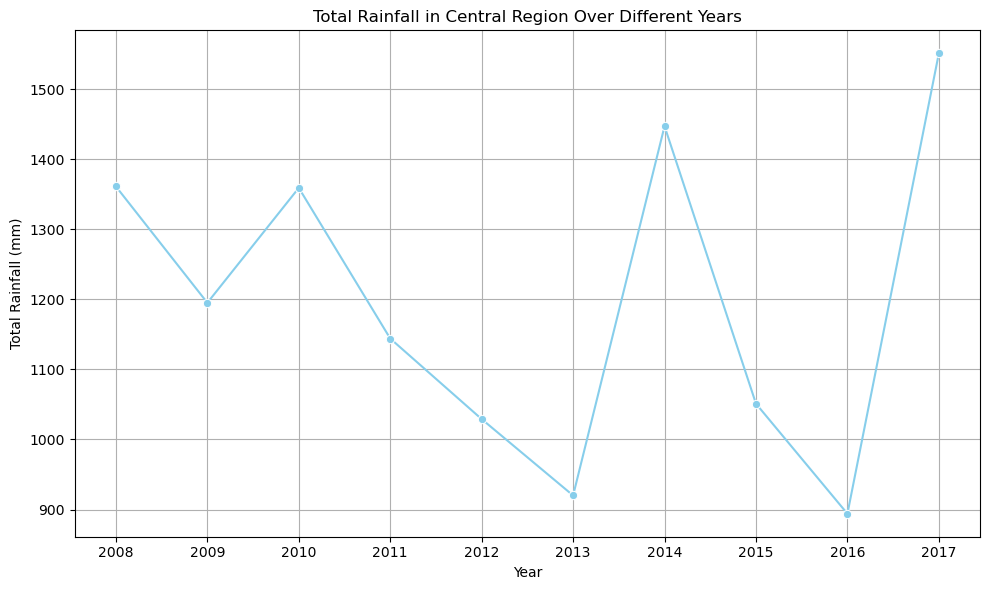

In [88]:
region_df = rainfall[rainfall['REGION'] == 'CENTRAL']

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=region_df, x='YEAR', y='TOTAL RAINFALL(MM)', marker='o', color='skyblue')
plt.title(f'Total Rainfall in Central Region Over Different Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(region_df['YEAR'])
plt.grid(True)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


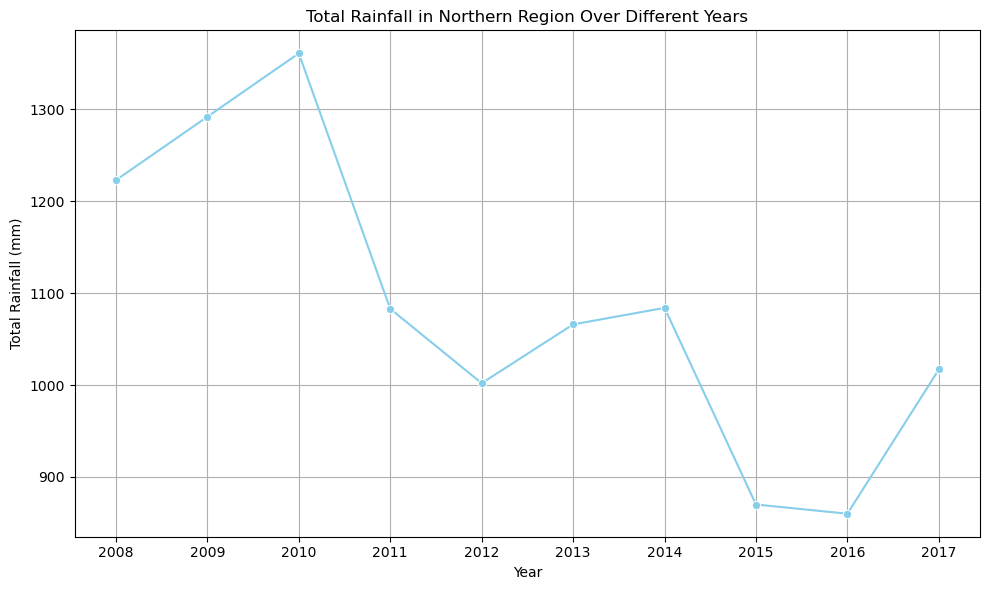

In [89]:
region_df = rainfall[rainfall['REGION'] == 'NORTHERN']

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=region_df, x='YEAR', y='TOTAL RAINFALL(MM)', marker='o', color='skyblue')
plt.title(f'Total Rainfall in Northern Region Over Different Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(region_df['YEAR'])
plt.grid(True)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


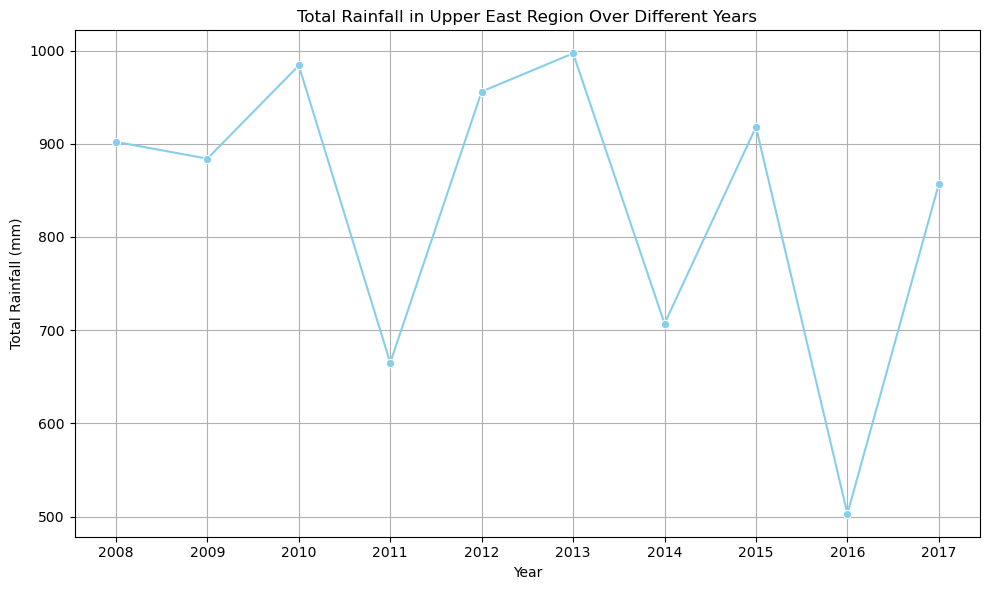

In [90]:
region_df = rainfall[rainfall['REGION'] == 'UPPER EAST']

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=region_df, x='YEAR', y='TOTAL RAINFALL(MM)', marker='o', color='skyblue')
plt.title(f'Total Rainfall in Upper East Region Over Different Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(region_df['YEAR'])
plt.grid(True)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


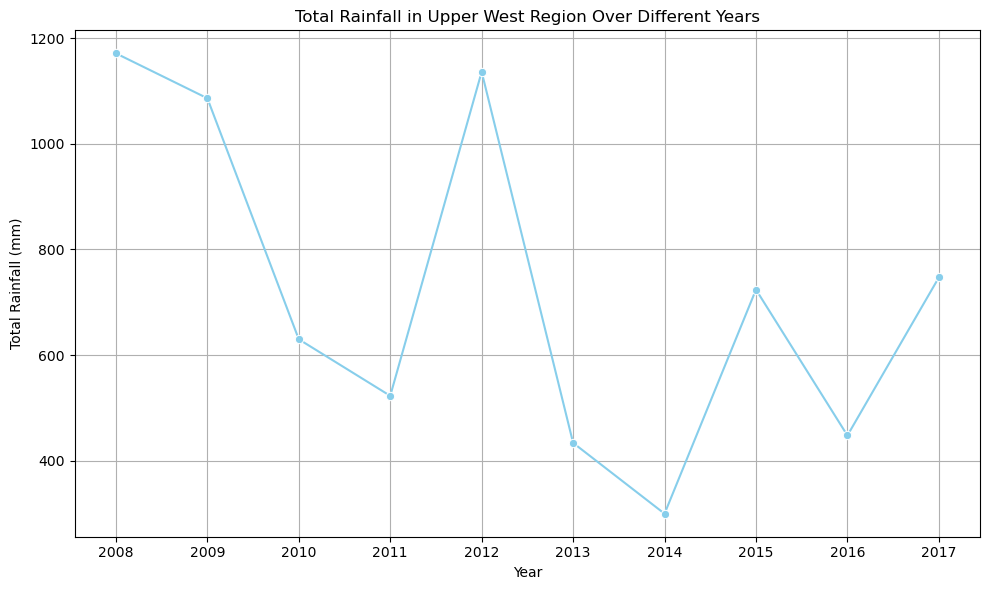

In [91]:
region_df = rainfall[rainfall['REGION'] == 'UPPER WEST']

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=region_df, x='YEAR', y='TOTAL RAINFALL(MM)', marker='o', color='skyblue')
plt.title(f'Total Rainfall in Upper West Region Over Different Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(region_df['YEAR'])
plt.grid(True)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


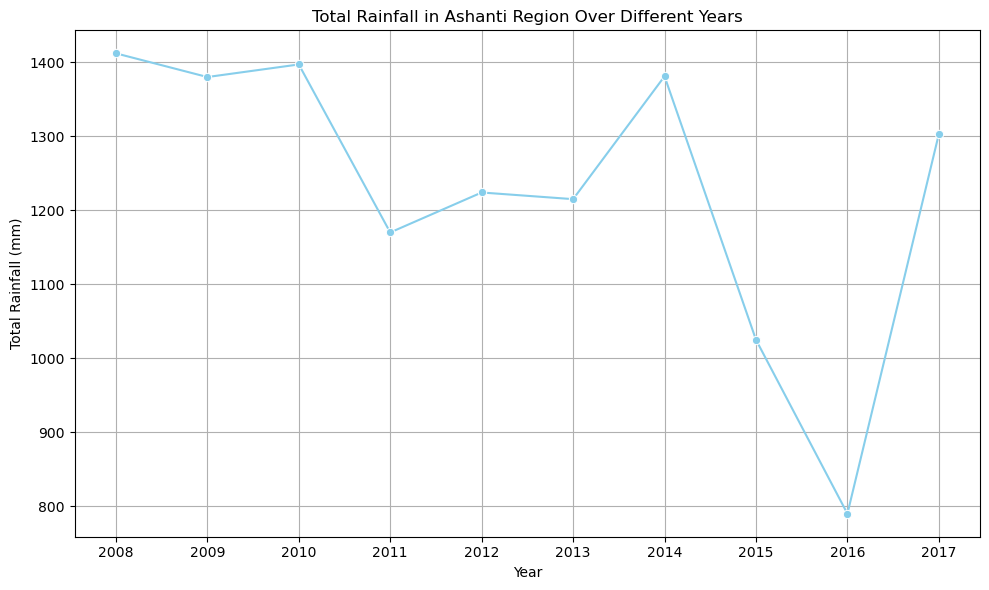

In [92]:
region_df = rainfall[rainfall['REGION'] == 'ASHANTI']

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=region_df, x='YEAR', y='TOTAL RAINFALL(MM)', marker='o', color='skyblue')
plt.title(f'Total Rainfall in Ashanti Region Over Different Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(region_df['YEAR'])
plt.grid(True)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


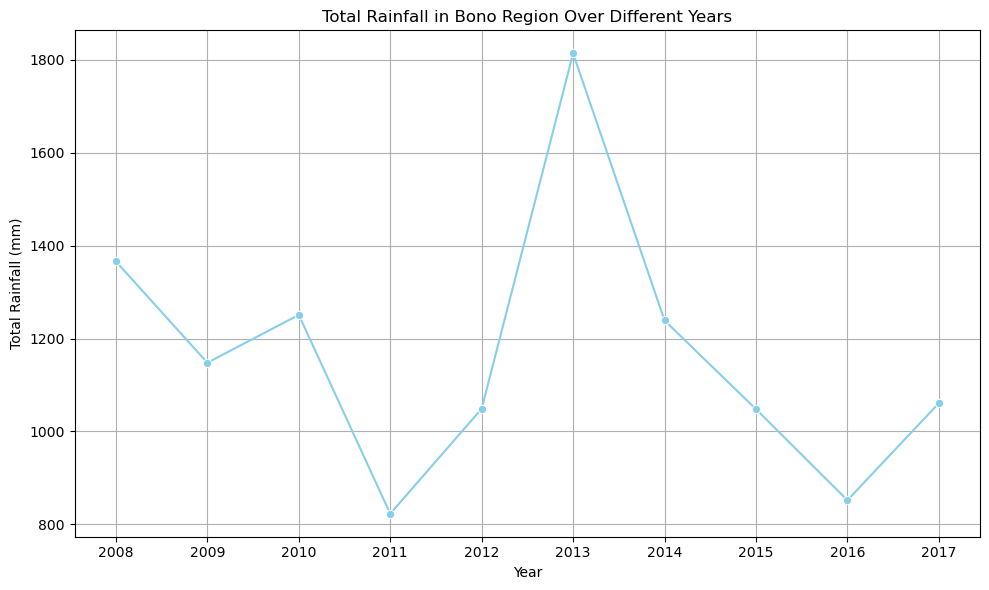

In [93]:
region_df = rainfall[rainfall['REGION'] == 'BRONG AHAFO']

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=region_df, x='YEAR', y='TOTAL RAINFALL(MM)', marker='o', color='skyblue')
plt.title(f'Total Rainfall in Bono Region Over Different Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(region_df['YEAR'])
plt.grid(True)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

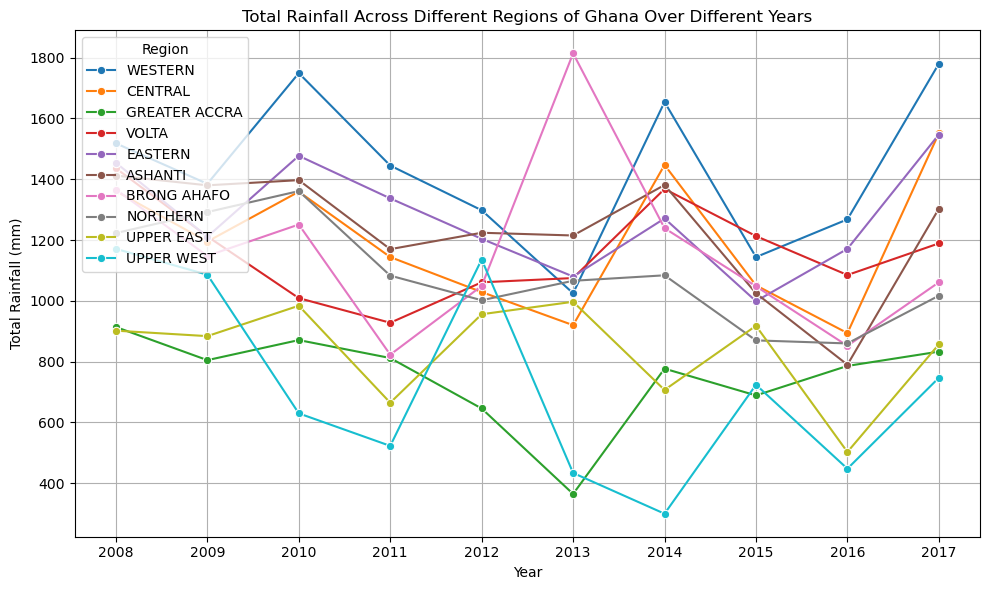

In [94]:
# Filter data for all regions
region_df = rainfall[rainfall['REGION'].isin(['ASHANTI', 'BRONG AHAFO', 'CENTRAL', 'EASTERN', 'GREATER ACCRA', 'NORTHERN', 'UPPER EAST', 'UPPER WEST', 'VOLTA', 'WESTERN'])]

# Plot
plt.figure(figsize=(10, 6))

# Loop through each region and plot its data
for region in region_df['REGION'].unique():
    data = region_df[region_df['REGION'] == region]
    sns.lineplot(data=data, x='YEAR', y='TOTAL RAINFALL(MM)', marker='o', label=region)

plt.title('Total Rainfall Across Different Regions of Ghana Over Different Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(region_df['YEAR'].unique())
plt.grid(True)
plt.tight_layout()
plt.legend(title='Region', loc='upper left')  # Add legend
plt.show()


In [95]:
crops_fil.head()

,Year,Month,Commodity,Weight,PRICE,Region,District,AREA (HA),Yield (MT/HA),Production (MT)
9540,2008,1,maize,100,13.694,western,shama ahanta east,1099.0,1.15,1263.85
9541,2008,1,maize,100,13.694,western,west ahanta,1433.0,1.19,1705.27
9542,2008,1,maize,100,13.694,western,mporhor wassa east,2034.0,1.32,2684.88
9543,2008,1,maize,100,13.694,western,wassa west,2204.0,1.20,2644.80
9544,2008,1,maize,100,13.694,western,east nzema,1550.0,1.38,2139.00


In [96]:
crops_fil['Region'].unique()

array(['western', 'central', 'eastern', 'volta', 'ashanti', 'brong ahafo',
       'upper east', 'upper west', 'greater accra', 'northern'],
      dtype=object)

In [97]:
rainfall.head()

,YEAR,REGION,TOTAL RAINFALL(MM)
0,2008,WESTERN,1518
1,2008,CENTRAL,1361
2,2008,GREATER ACCRA,914
3,2008,VOLTA,1436
4,2008,EASTERN,1454


In [98]:
rainfall['REGION'].unique()

array(['WESTERN', 'CENTRAL', 'GREATER ACCRA', 'VOLTA', 'EASTERN',
       'ASHANTI', 'BRONG AHAFO', 'NORTHERN', 'UPPER EAST', 'UPPER WEST'],
      dtype=object)

In [99]:
#Renaming columns
rainfall.rename(columns={'YEAR': 'Year', 'REGION': 'Region','TOTAL RAINFALL(MM)':'Total Rainfall(mm)'}, inplace=True)
rainfall.head()

,Year,Region,Total Rainfall(mm)
0,2008,WESTERN,1518
1,2008,CENTRAL,1361
2,2008,GREATER ACCRA,914
3,2008,VOLTA,1436
4,2008,EASTERN,1454


In [100]:
rainfall['Region'] = rainfall['Region'].str.lower()
rainfall.head()

,Year,Region,Total Rainfall(mm)
0,2008,western,1518
1,2008,central,1361
2,2008,greater accra,914
3,2008,volta,1436
4,2008,eastern,1454


In [101]:
# Merge the two DataFrames based on Year and region columns
final_df = pd.merge(crops_fil,rainfall, on=['Year', 'Region'])

display(final_df)

,Year,Month,Commodity,Weight,PRICE,Region,District,AREA (HA),Yield (MT/HA),Production (MT),Total Rainfall(mm)
0,2008,1,maize,100,13.694,western,shama ahanta east,1099.0,1.15,1263.85,1518
1,2008,1,maize,100,13.694,western,west ahanta,1433.0,1.19,1705.27,1518
2,2008,1,maize,100,13.694,western,mporhor wassa east,2034.0,1.32,2684.88,1518
3,2008,1,maize,100,13.694,western,wassa west,2204.0,1.20,2644.80,1518
4,2008,1,maize,100,13.694,western,east nzema,1550.0,1.38,2139.00,1518
...,...,...,...,...,...,...,...,...,...,...,...
59853,2017,12,cocoyam,91,195.170,ashanti,obuasi municipal (adansi west),437.0,4.82,2106.34,1303
59854,2017,12,cocoyam,91,195.170,ashanti,adansi south,2382.0,6.62,15768.84,1303
59855,2017,12,cocoyam,91,195.170,ashanti,asante akim north,1254.0,6.84,8577.36,1303
59856,2017,12,cocoyam,91,195.170,ashanti,asante akim south,8043.0,5.64,45362.52,1303


In [102]:
#finding regions with the highest districts
districts_per_region = final_df.groupby('Region')['District'].nunique()
districts_per_region

Region
ashanti          34
brong ahafo      32
central          22
eastern          28
greater accra    15
northern         26
upper east       18
upper west       12
volta            33
western          30
Name: District, dtype: int64

In [103]:
# Group the data by 'Region' and count the number of unique districts in each region
districts_per_region = final_df.groupby('Region')['District'].nunique()

# Calculate the average rainfall per district for each region
average_rainfall_per_district = final_df.groupby('Region')['Total Rainfall(mm)'].first() / districts_per_region

# Print the result
print(average_rainfall_per_district)


Region
ashanti          41.529412
brong ahafo      42.687500
central          61.863636
eastern          51.928571
greater accra    55.533333
northern         39.115385
upper east       50.111111
upper west       97.583333
volta            43.515152
western          50.600000
dtype: float64


In [104]:
#saving to csv 
#to prepare it for machine learning
#final_df.to_csv('Crop_final.csv', index=False)
